### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

### Load the datasets

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

### Check for missing values in training dataset

In [3]:
print("\nMissing values in training data:")
print(train_data.isnull().sum())


Missing values in training data:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


### Select relevant features for the prediction model

In [4]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath']  # Predictor variables
X = train_data[features]  # Independent variables
y = train_data['SalePrice']  # Target variable


### Handle missing values by filling with mean

In [5]:
X = X.fillna(X.mean())

### Split the data into training and validation sets (80% train, 20% validation)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize and train the Linear Regression model

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Make predictions on the validation set

In [8]:
y_pred = model.predict(X_val)


### Evaluate model performance

In [9]:
rmse = sqrt(mean_squared_error(y_val, y_pred))
print(f'\nRoot Mean Squared Error (RMSE): {rmse}')



Root Mean Squared Error (RMSE): 53018.32669198515


### Visualize Actual vs Predicted Sale Price

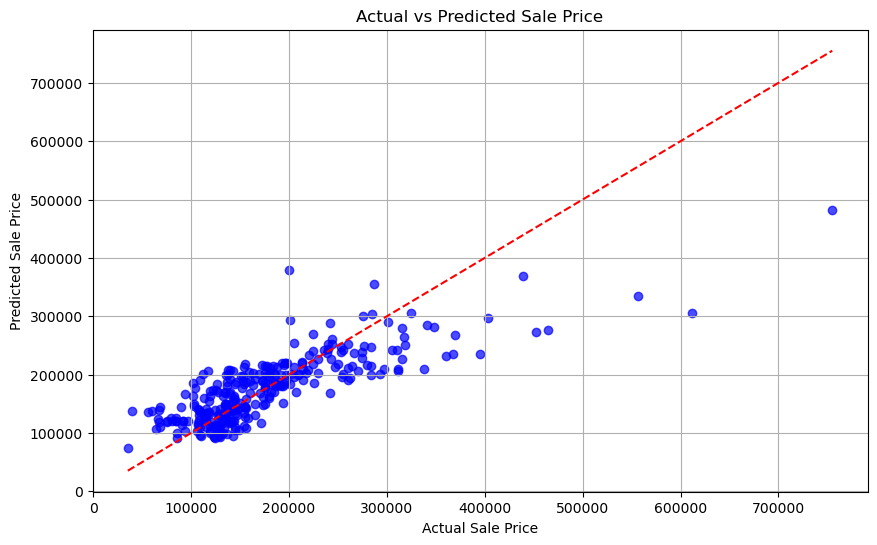

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.7, color='b')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='r', linestyle='--')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Price')
plt.grid(True)
plt.show()

### Plot Residuals (errors)

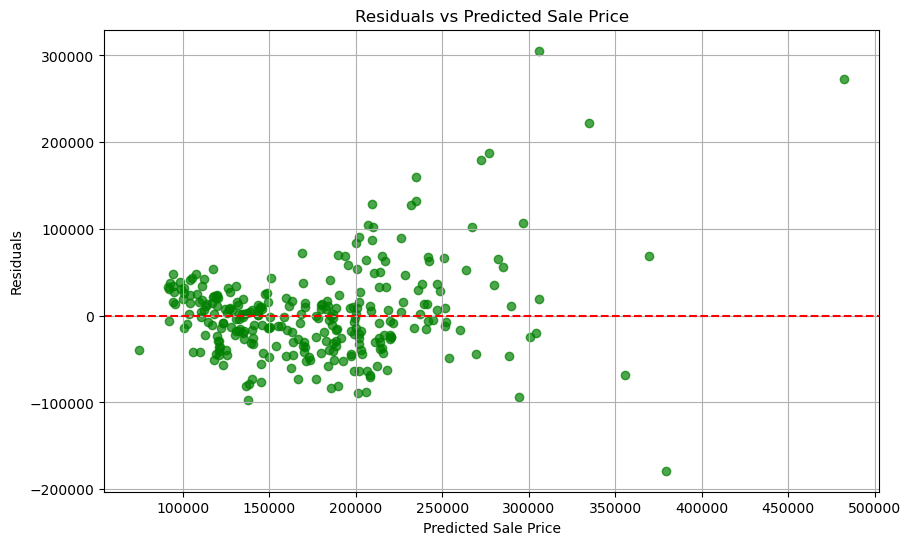

In [11]:
residuals = y_val - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7, color='g')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sale Price')
plt.grid(True)
plt.show()

### Plot distribution of residuals

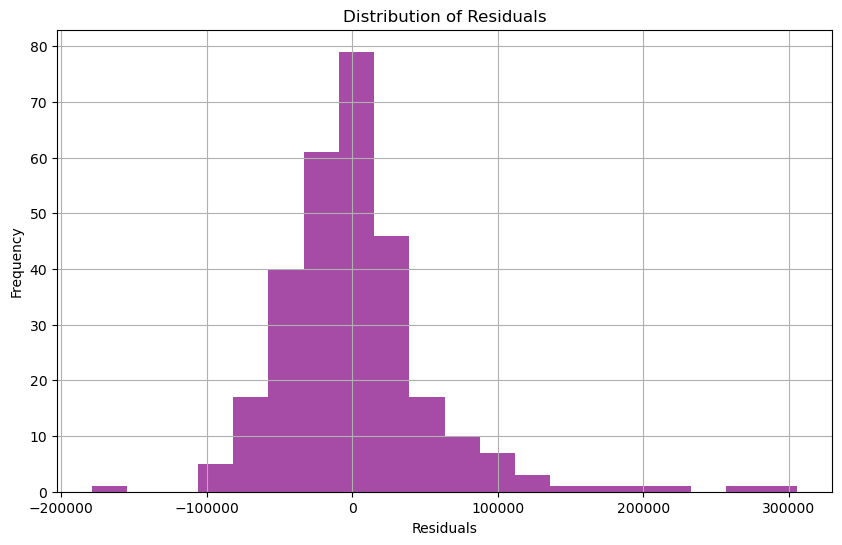

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Plot feature relationships with Sale Price

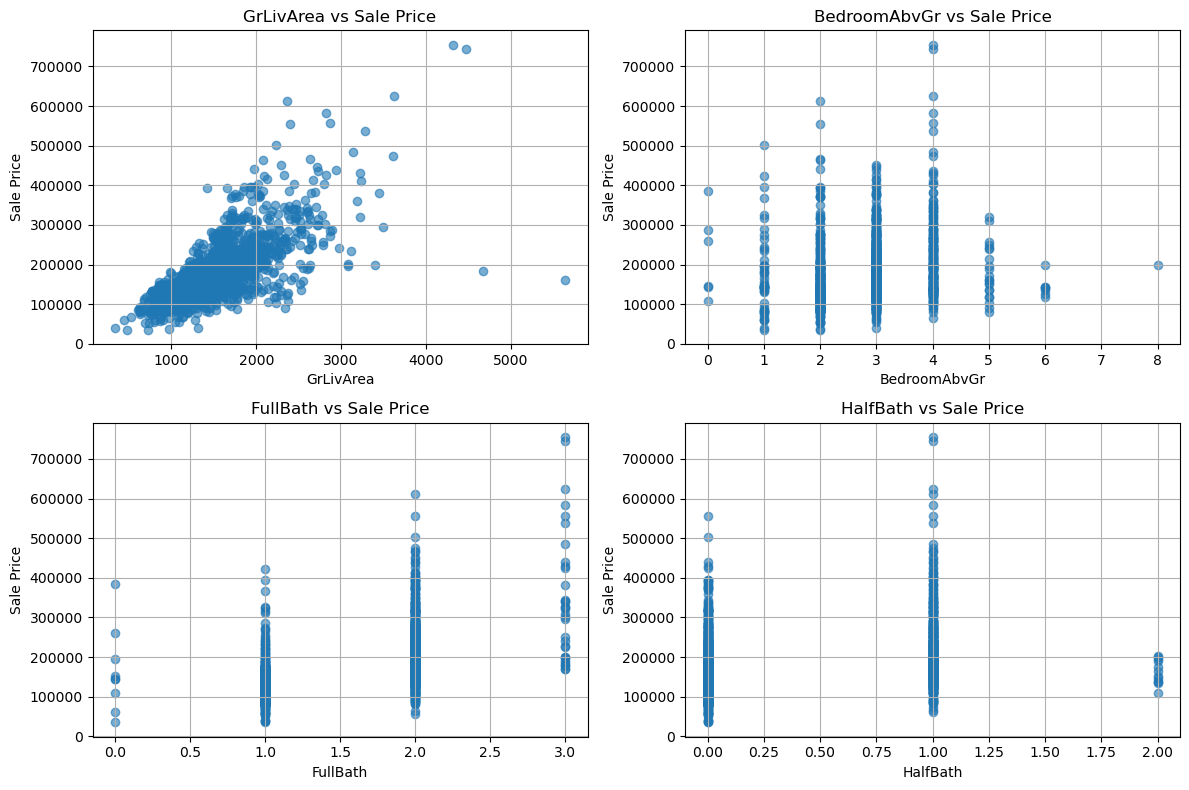

In [13]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    plt.scatter(train_data[feature], y, alpha=0.6)
    plt.title(f'{feature} vs Sale Price')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.grid(True)
plt.tight_layout()
plt.show()

### Correlation matrix heatmap

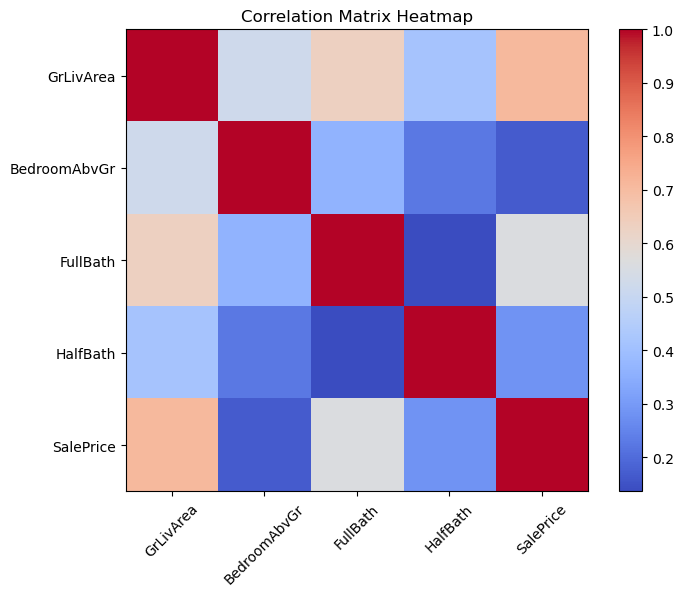

In [14]:
plt.figure(figsize=(8, 6))
correlation_matrix = train_data[features + ['SalePrice']].corr()
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(ticks=np.arange(len(correlation_matrix)), labels=correlation_matrix.columns, rotation=45)
plt.yticks(ticks=np.arange(len(correlation_matrix)), labels=correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()


### Prepare the test dataset

In [15]:
X_test = test_data[features].fillna(test_data[features].mean())  # Handle missing values

### Make predictions on the test dataset

In [16]:
test_predictions = model.predict(X_test)

### Prepare submission DataFrame

In [17]:
submission = sample_submission.copy()
submission['SalePrice'] = test_predictions

### Save the submission file

In [18]:
submission.to_csv('submission.csv', index=False)
print("\nSubmission file 'submission.csv' has been created.")


Submission file 'submission.csv' has been created.
